In [31]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

In [32]:
london_latitude = 51.5074
london_longitude = -0.1278
seattle_latitude = 47.6062
seattle_longitude = -122.3321

start_date = '2022-01-01'
end_date = '2022-12-31'

hourly_variables = ['precipitation']

base_url = 'https://archive-api.open-meteo.com/v1/archive'

In [33]:
london_params = {
    'latitude': london_latitude,
    'longitude': london_longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

seattle_params = {
    'latitude': seattle_latitude,
    'longitude': seattle_longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

london_response = requests.get(base_url, params=london_params)
seattle_response = requests.get(base_url, params=seattle_params)

In [34]:
london_data = london_response.json()
london_hourly = london_data['hourly']
df_london = pd.DataFrame(london_hourly)

seattle_data = seattle_response.json()
seattle_hourly = seattle_data['hourly']
df_seattle = pd.DataFrame(seattle_hourly)

# Data Cleaning
df_london['time'] = pd.to_datetime(df_london['time'])
df_london.set_index('time', inplace=True)
df_london.fillna(0, inplace=True)  # Replace missing values with 0 for precipitation

df_seattle['time'] = pd.to_datetime(df_seattle['time'])
df_seattle.set_index('time', inplace=True)
df_seattle.fillna(0, inplace=True)  # Replace missing values with 0 for precipitation

print(df_london.head())
print(df_seattle.head())

                     precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0
                     precipitation
time                              
2022-01-01 00:00:00            0.0
2022-01-01 01:00:00            0.0
2022-01-01 02:00:00            0.0
2022-01-01 03:00:00            0.0
2022-01-01 04:00:00            0.0


In [35]:
# Resample data to weekly totals
london_weekly = df_london.resample('W').sum()  # 'W' means weekly

seattle_weekly = df_seattle.resample('W').sum()

print(london_weekly.head())
print(seattle_weekly.head())

            precipitation
time                     
2022-01-02            2.2
2022-01-09           12.9
2022-01-16            3.1
2022-01-23            0.0
2022-01-30            0.4
            precipitation
time                     
2022-01-02           31.3
2022-01-09          108.8
2022-01-16           45.5
2022-01-23           15.7
2022-01-30            6.1


<Figure size 1400x800 with 0 Axes>

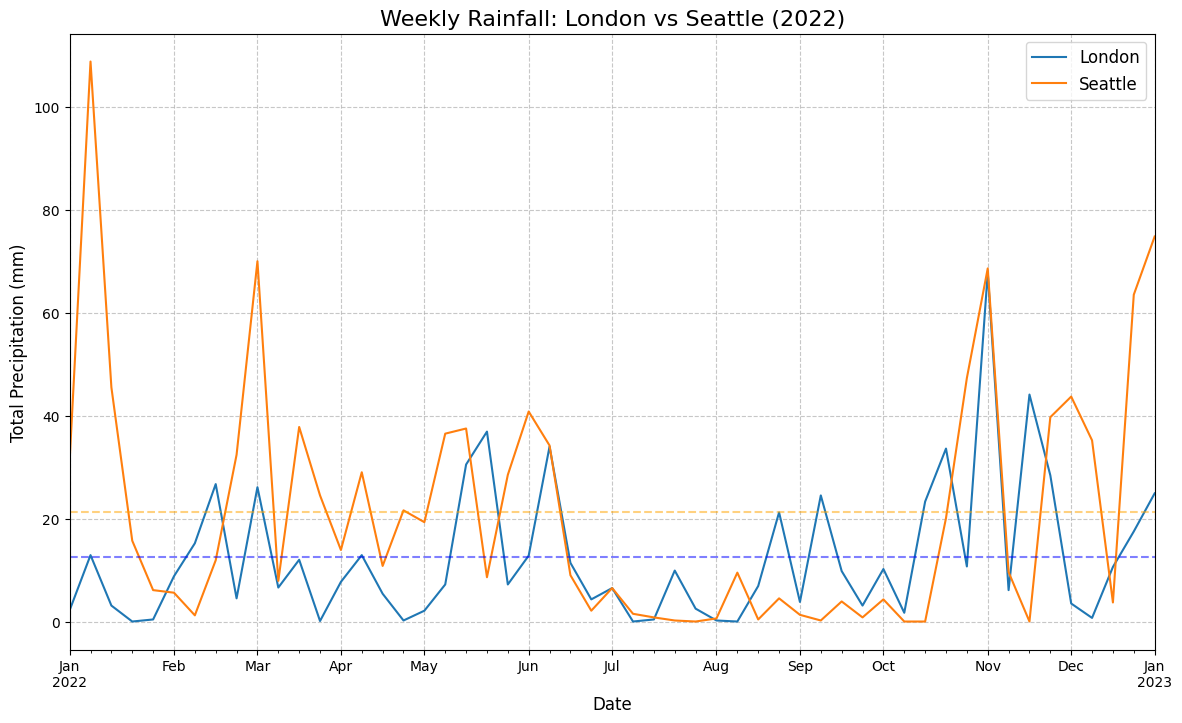

In [36]:
# DataFrame to combine both cities weekly rainfall
combined_rain = pd.DataFrame({
    'London': london_weekly['precipitation'],
    'Seattle': seattle_weekly['precipitation']
})

plt.figure(figsize=(14, 8))
combined_rain.plot(kind='line', figsize=(14, 8))
plt.title('Weekly Rainfall: London vs Seattle (2022)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['London', 'Seattle'], fontsize=12)

plt.axhline(y=combined_rain['London'].mean(), color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=combined_rain['Seattle'].mean(), color='orange', linestyle='--', alpha=0.5)

plt.show()

Analysis

In [37]:
# Total annual rainfall for each city

london_total = df_london['precipitation'].sum()
seattle_total = df_seattle['precipitation'].sum()

print(f"Total annual rainfall in London (2022): {london_total:.2f} mm")
print(f"Total annual rainfall in Seattle (2022): {seattle_total:.2f} mm")
print(f"Difference: {abs(london_total - seattle_total):.2f} mm")

if london_total > seattle_total:
    print("London had more rainfall than Seattle in 2022.")
else:
    print("Seattle had more rainfall than London in 2022.")

Total annual rainfall in London (2022): 663.10 mm
Total annual rainfall in Seattle (2022): 1131.20 mm
Difference: 468.10 mm
Seattle had more rainfall than London in 2022.


In [38]:
# Average weekly rainfall
london_avg = london_weekly['precipitation'].mean()
seattle_avg = seattle_weekly['precipitation'].mean()

print(f"\nAverage weekly rainfall in London: {london_avg:.2f} mm")
print(f"Average weekly rainfall in Seattle: {seattle_avg:.2f} mm")


Average weekly rainfall in London: 12.51 mm
Average weekly rainfall in Seattle: 21.34 mm


In [39]:
# Finding the week with maximum rainfall for each city

london_max_week = london_weekly['precipitation'].idxmax()
seattle_max_week = seattle_weekly['precipitation'].idxmax()

print(f"\nLondon's rainiest week ended on: {london_max_week.date()} with {london_weekly['precipitation'].max():.2f} mm")
print(f"Seattle's rainiest week ended on: {seattle_max_week.date()} with {seattle_weekly['precipitation'].max():.2f} mm")


London's rainiest week ended on: 2022-11-06 with 67.80 mm
Seattle's rainiest week ended on: 2022-01-09 with 108.80 mm


In [40]:
# Identifying seasonal patterns

seasons = {
    'Winter': ['2022-01-01', '2022-03-20'],
    'Spring': ['2022-03-21', '2022-06-20'],
    'Summer': ['2022-06-21', '2022-09-22'],
    'Fall': ['2022-09-23', '2022-12-20'],
    'Winter2': ['2022-12-21', '2022-12-31']
}

def seasonal_rainfall(df, seasons):
    seasonal_totals = {}
    for season, dates in seasons.items():
        start, end = pd.to_datetime(dates)
        mask = (df.index >= start) & (df.index <= end)
        seasonal_totals[season] = df.loc[mask, 'precipitation'].sum()
    return seasonal_totals

In [41]:
# Seasonal rainfall for both cities
london_seasons = seasonal_rainfall(df_london, seasons)
seattle_seasons = seasonal_rainfall(df_seattle, seasons)

seasonal_df = pd.DataFrame({
    'London': london_seasons,
    'Seattle': seattle_seasons
})
seasonal_df = seasonal_df.round(2)

print("\nSeasonal Rainfall Totals (mm):")
print(seasonal_df)


Seasonal Rainfall Totals (mm):
         London  Seattle
Winter    118.4    370.6
Spring    168.4    314.2
Summer     89.7     31.1
Fall      249.5    276.2
Winter2    24.6    121.2


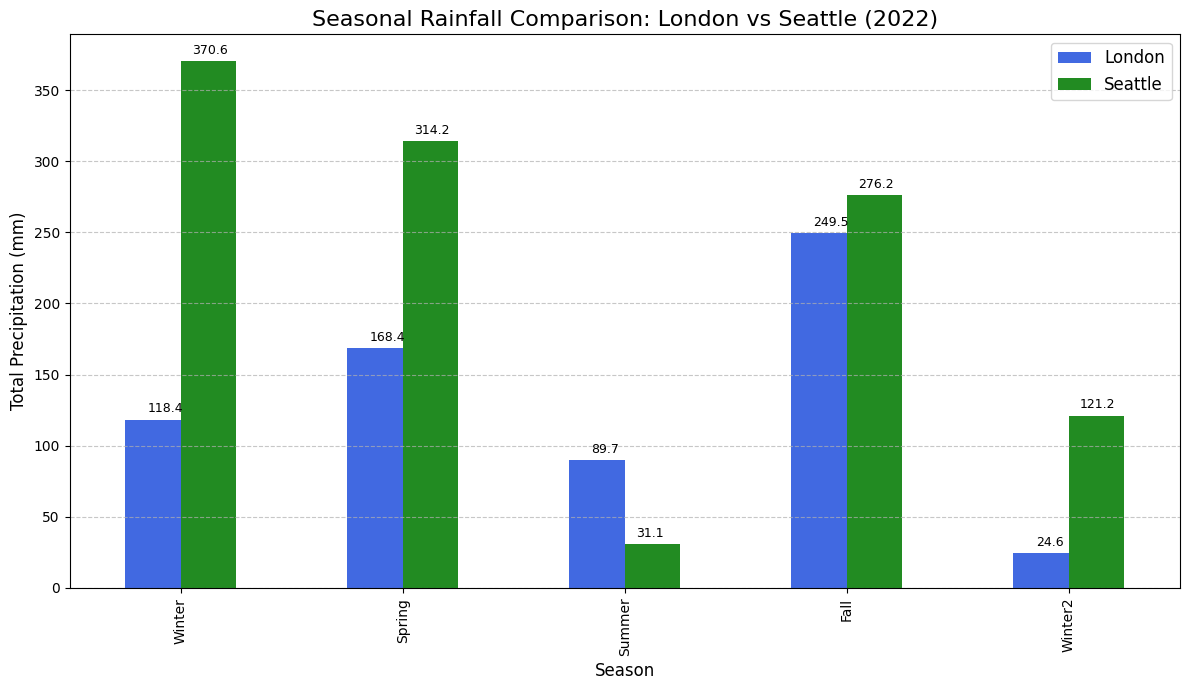

In [42]:
# Bar Chart
seasonal_df[['London', 'Seattle']].plot(
    kind='bar', 
    figsize=(12, 7),
    color=['royalblue', 'forestgreen']
)
plt.title('Seasonal Rainfall Comparison: London vs Seattle (2022)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# value labels
for i, v in enumerate(seasonal_df['London']):
    plt.text(i-0.15, v+5, f'{v:.1f}', fontsize=9)
    
for i, v in enumerate(seasonal_df['Seattle']):
    plt.text(i+0.05, v+5, f'{v:.1f}', fontsize=9)

plt.tight_layout()
plt.show()